In [14]:
import sys
sys.path.append('../') #
import paths
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [15]:
mimic_files=["mimic.json","mimic_no_img.json", "mimic_no_candidate_img.json"]
blink_files=["BLINK_Biencoder.json","BLINK_Cross.json"]

In [18]:
base_mimic_path = Path().cwd().parent / paths.OUTPUT_DATASETS_PATH / 'melart_mimic' / 'MELART_test.json'
print(base_mimic_path.as_posix())
mimic_test_set = json.load(open(base_mimic_path))
mimic_test_set[:5]

/hpi/fs00/home/alejandro.sierra/MELArt_experiments/output_datasets/melart_mimic/MELART_test.json


[{'id': 'Q1608116_0',
  'sentence': 'It is also stylistically earlier to that work, being painted without pseudo-perspective, and having the angels around the Virgin simply placed one above the other, rather than being spatially arranged.',
  'imgPath': 'Q1608116.jpg',
  'mentions': 'Virgin',
  'entities': 'Mary',
  'answer': 'Q345'},
 {'id': 'Q1608116_1',
  'sentence': 'This work established a new canon for the Madonna with Child theme, which was subsequently used by other painters, such as Duccio di Buoninsegna in his Rucellai Maestà.',
  'imgPath': 'Q1608116.jpg',
  'mentions': 'Madonna',
  'entities': 'Mary',
  'answer': 'Q345'},
 {'id': 'Q1608116_2',
  'sentence': 'This work established a new canon for the Madonna with Child theme, which was subsequently used by other painters, such as Duccio di Buoninsegna in his Rucellai Maestà.',
  'imgPath': 'Q1608116.jpg',
  'mentions': 'Child',
  'entities': 'Christ Child',
  'answer': 'Q942467'},
 {'id': 'Q3797775_0',
  'sentence': 'The thr

In [19]:
ranks=None
for mimic_file in mimic_files:
    anns=json.load(open(mimic_file))
    if ranks is None:
        #fill with empty dictionaries
        ranks=[{} for i in range(len(anns))]
    for i,ann in enumerate(anns):
        ranks[i][mimic_file]=ann['gt_rank']+1
ranks[:10]

[{'mimic.json': 1, 'mimic_no_img.json': 16, 'mimic_no_candidate_img.json': 20},
 {'mimic.json': 5, 'mimic_no_img.json': 15, 'mimic_no_candidate_img.json': 14},
 {'mimic.json': 2, 'mimic_no_img.json': 4, 'mimic_no_candidate_img.json': 7},
 {'mimic.json': 1, 'mimic_no_img.json': 1, 'mimic_no_candidate_img.json': 1},
 {'mimic.json': 2, 'mimic_no_img.json': 1, 'mimic_no_candidate_img.json': 1},
 {'mimic.json': 1, 'mimic_no_img.json': 1, 'mimic_no_candidate_img.json': 1},
 {'mimic.json': 16,
  'mimic_no_img.json': 15,
  'mimic_no_candidate_img.json': 20},
 {'mimic.json': 11, 'mimic_no_img.json': 5, 'mimic_no_candidate_img.json': 2},
 {'mimic.json': 11, 'mimic_no_img.json': 5, 'mimic_no_candidate_img.json': 2},
 {'mimic.json': 3, 'mimic_no_img.json': 6, 'mimic_no_candidate_img.json': 3}]

In [20]:
labels={
    "mimic.json":"MIMIC",
    "mimic_no_img.json":"MIMIC (no images)",
    "mimic_no_candidate_img.json":"MIMIC (no candidate image)",
    "BLINK_Biencoder.json":"BLINK (Biencoder)",
    "BLINK_Cross.json":"BLINK (Crossencoder)"
}

In [21]:
for blink_file in blink_files:
    anns=json.load(open(blink_file))
    for i,ann in enumerate(anns):
        ranks[i][blink_file]=ann['gt_rank']+1 if ann['gt_rank']>=0 else 500
ranks[:10]

[{'mimic.json': 1,
  'mimic_no_img.json': 16,
  'mimic_no_candidate_img.json': 20,
  'BLINK_Biencoder.json': 12,
  'BLINK_Cross.json': 1},
 {'mimic.json': 5,
  'mimic_no_img.json': 15,
  'mimic_no_candidate_img.json': 14,
  'BLINK_Biencoder.json': 4,
  'BLINK_Cross.json': 1},
 {'mimic.json': 2,
  'mimic_no_img.json': 4,
  'mimic_no_candidate_img.json': 7,
  'BLINK_Biencoder.json': 2,
  'BLINK_Cross.json': 1},
 {'mimic.json': 1,
  'mimic_no_img.json': 1,
  'mimic_no_candidate_img.json': 1,
  'BLINK_Biencoder.json': 12,
  'BLINK_Cross.json': 1},
 {'mimic.json': 2,
  'mimic_no_img.json': 1,
  'mimic_no_candidate_img.json': 1,
  'BLINK_Biencoder.json': 6,
  'BLINK_Cross.json': 1},
 {'mimic.json': 1,
  'mimic_no_img.json': 1,
  'mimic_no_candidate_img.json': 1,
  'BLINK_Biencoder.json': 14,
  'BLINK_Cross.json': 1},
 {'mimic.json': 16,
  'mimic_no_img.json': 15,
  'mimic_no_candidate_img.json': 20,
  'BLINK_Biencoder.json': 4,
  'BLINK_Cross.json': 1},
 {'mimic.json': 11,
  'mimic_no_img.js

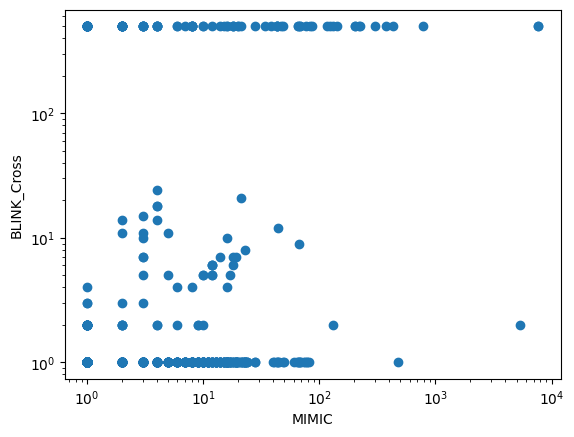

In [22]:
#plot a scatter plot with the values of mimic and BLINK_Cross
plt.scatter([r['mimic.json'] for r in ranks], [r['BLINK_Cross.json'] for r in ranks])
plt.xlabel("MIMIC")
plt.ylabel("BLINK_Cross")
#plt.xlim(0,500)
#plt.ylim(0,500)
#log scale
plt.xscale('log')
plt.yscale('log')


In [24]:
#which queries have a good score in MIMIC but not in BLINK_Cross
for i,r in enumerate(ranks):
    if r['mimic.json']<10 and r['BLINK_Cross.json']>100:
        print(mimic_test_set[i]['sentence'])
        print(mimic_test_set[i]['entities'])
        print(r)
        print()

The crucified Christ is lowered from the cross, his lifeless body held by Joseph of Arimathea and Nicodemus.
Nicodemus
{'mimic.json': 1, 'mimic_no_img.json': 1, 'mimic_no_candidate_img.json': 1, 'BLINK_Biencoder.json': 500, 'BLINK_Cross.json': 500}

John (19:38–42) adds one assistant, Nicodemus.
Nicodemus
{'mimic.json': 1, 'mimic_no_img.json': 4, 'mimic_no_candidate_img.json': 2, 'BLINK_Biencoder.json': 500, 'BLINK_Cross.json': 500}

During the Middle Ages, the narrative of the Passion became more elaborate, and more attention was paid to the role of Christ's mother.
Mary
{'mimic.json': 8, 'mimic_no_img.json': 9, 'mimic_no_candidate_img.json': 8, 'BLINK_Biencoder.json': 500, 'BLINK_Cross.json': 500}

Art historian Lorne Campbell has identified the figures in the painting as (from left to right): Mary Cleophas (half-sister to the Virgin Mary); John the Evangelist, Mary Salome (in green, another half-sister of the Virgin Mary), The Virgin Mary (swooning), the corpse of Jesus Christ, Nico

In [25]:
#which queries have a bad score in MIMIC but good in BLINK_Cross
for i,r in enumerate(ranks):
    if r['mimic.json']>100 and r['BLINK_Cross.json']<10:
        print(mimic_test_set[i]['sentence'])
        print(mimic_test_set[i]['entities'])
        print(r)
        print()

David's works also show Napoleon's journey through the Great St. Bernard Pass, but there are significant stylistic differences between the two conceptions.
Great St Bernard Pass
{'mimic.json': 475, 'mimic_no_img.json': 8, 'mimic_no_candidate_img.json': 95, 'BLINK_Biencoder.json': 23, 'BLINK_Cross.json': 1}

In the painting, Rand is reading a book while petting a cat.
Benjamin Howard Rand
{'mimic.json': 131, 'mimic_no_img.json': 5, 'mimic_no_candidate_img.json': 20, 'BLINK_Biencoder.json': 5, 'BLINK_Cross.json': 2}

The Sleeping Gypsy  (French: La Bohémienne endormie) is an 1897 oil painting by French Naïve artist Henri Rousseau (1844–1910).
Romani people
{'mimic.json': 5343, 'mimic_no_img.json': 272, 'mimic_no_candidate_img.json': 1102, 'BLINK_Biencoder.json': 9, 'BLINK_Cross.json': 2}



In [26]:
#which queries have a good score in MIMIC and good in BLINK_Cross
for i,r in enumerate(ranks):
    if r['mimic.json']<3 and r['BLINK_Cross.json']<3:
        print(mimic_test_set[i]['sentence'])
        print(mimic_test_set[i]['entities'])
        print(r)
        print()

It is also stylistically earlier to that work, being painted without pseudo-perspective, and having the angels around the Virgin simply placed one above the other, rather than being spatially arranged.
Mary
{'mimic.json': 1, 'mimic_no_img.json': 16, 'mimic_no_candidate_img.json': 20, 'BLINK_Biencoder.json': 12, 'BLINK_Cross.json': 1}

This work established a new canon for the Madonna with Child theme, which was subsequently used by other painters, such as Duccio di Buoninsegna in his Rucellai Maestà.
Christ Child
{'mimic.json': 2, 'mimic_no_img.json': 4, 'mimic_no_candidate_img.json': 7, 'BLINK_Biencoder.json': 2, 'BLINK_Cross.json': 1}

The three arches are decorated with vegetable motifs; over them are three panels (whose upper frame is lost), containing the paintings, from the left, of the Angel of the Annunciation, the Blessing Christ between Cherubims and the Annunciation.
Jesus
{'mimic.json': 1, 'mimic_no_img.json': 1, 'mimic_no_candidate_img.json': 1, 'BLINK_Biencoder.json': 12,

In [27]:
#which queries have a bad score in MIMIC and bad in BLINK_Cross
for i,r in enumerate(ranks):
    if r['mimic.json']>100 and r['BLINK_Cross.json']>100:
        print(mimic_test_set[i]['sentence'])
        print(mimic_test_set[i]['entities'])
        print(r)
        print()

One example is the anonymous 14th-century text, Meditationes de Vita Christi, perhaps by Ludolph of Saxony.
Jesus
{'mimic.json': 302, 'mimic_no_img.json': 1560, 'mimic_no_candidate_img.json': 2398, 'BLINK_Biencoder.json': 500, 'BLINK_Cross.json': 500}

Barbara Lane suggests this passage from the Vita Christi might lie behind many paintings of the Deposition, including Rogier's: "Then the lady reverently receives the hanging right hand and places it against her cheek gazes upon it, and kisses it with heavy tears and sorrowful sighs.
Jesus
{'mimic.json': 783, 'mimic_no_img.json': 3361, 'mimic_no_candidate_img.json': 3006, 'BLINK_Biencoder.json': 500, 'BLINK_Cross.json': 500}

Perhaps some of the Chancellor's many landholdings around Autun are included in the vista.
Nicolas Rolin
{'mimic.json': 430, 'mimic_no_img.json': 4598, 'mimic_no_candidate_img.json': 8121, 'BLINK_Biencoder.json': 500, 'BLINK_Cross.json': 500}

Another portion of landscape is in the middle part, with two shepherds po

/tmp/ipykernel_1948935/3380727739.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([[r[f] for r in ranks] for f in mimic_files+blink_files],labels=[labels[f] for f in mimic_files+blink_files])


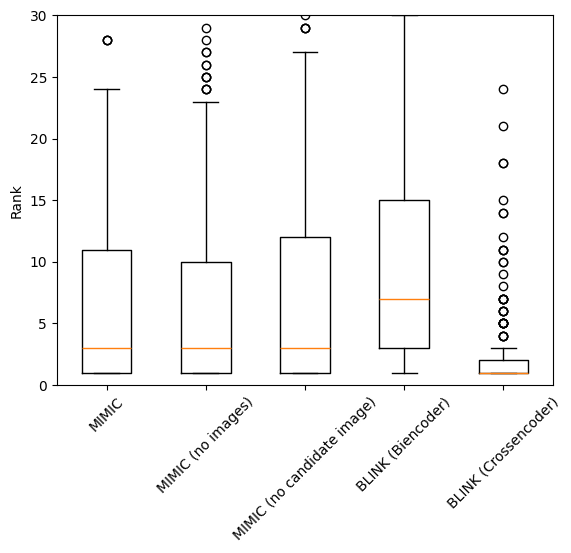

In [21]:
#plot a boxplot for all ranks the methods
plt.boxplot([[r[f] for r in ranks] for f in mimic_files+blink_files],labels=[labels[f] for f in mimic_files+blink_files])
plt.ylabel("Rank")
plt.ylim(0,30)
plt.xticks(rotation=45)
plt.show()


In [26]:
qids=[obj["answer"] for obj in mimic_test_set]
len(qids)

645

In [27]:
#dictionary with qid as key and the list of indices as value
qid2idxs={}
for i,qid in enumerate(qids):
    if qid not in qid2idxs:
        qid2idxs[qid]=[]
    qid2idxs[qid].append(i)
qid2idxs["Q345"]

[0,
 1,
 6,
 9,
 24,
 25,
 28,
 29,
 30,
 31,
 33,
 36,
 37,
 50,
 55,
 57,
 61,
 65,
 69,
 72,
 75,
 81,
 83,
 84,
 88,
 89,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 107,
 109,
 119,
 121,
 122,
 123,
 124,
 126,
 128,
 131,
 142,
 146,
 148,
 163,
 166,
 189,
 193,
 194,
 199,
 201,
 202,
 203,
 206,
 208,
 209,
 210,
 211,
 212,
 214,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 225,
 227,
 228,
 230,
 231,
 232,
 233,
 234,
 236,
 238,
 239,
 241,
 245,
 246,
 248,
 249,
 257,
 259,
 266,
 268,
 269,
 270,
 271,
 277,
 279,
 300,
 302,
 307,
 308,
 310,
 311,
 312,
 360,
 361,
 362,
 363,
 366,
 383]

In [28]:
len(qid2idxs)

124

In [29]:
qid2label={}
for ann in mimic_test_set:
    qid2label[ann["answer"]]=ann["entities"]
qid2label["Q345"]

'Mary'

In [30]:
len(qid2label)

124

In [33]:
# dictionary with qid as key and the list of ranks per method as value
qid2ranks={}
for qid,idxs in qid2idxs.items():
    qid2ranks[qid]={}
    for f in mimic_files+blink_files:
        qid2ranks[qid][labels[f]]=[ranks[i][f] for i in idxs]

In [44]:
num_ranks_per_qid=[]
for qid,ranks in qid2ranks.items():
    num_ranks_per_qid.append((qid,len(ranks["MIMIC"])))
num_ranks_per_qid[:10]

[('Q345', 108),
 ('Q942467', 33),
 ('Q302', 62),
 ('Q1093370', 3),
 ('Q271474', 6),
 ('Q295084', 6),
 ('Q51636', 1),
 ('Q328804', 3),
 ('Q235377', 1),
 ('Q233067', 1)]

In [45]:
#sort indices by number of ranks
num_ranks_per_qid.sort(key=lambda x:x[1],reverse=True)
num_ranks_per_qid[:10]

[('Q345', 108),
 ('Q302', 62),
 ('Q942467', 33),
 ('Q5588', 18),
 ('Q42207', 16),
 ('Q47652', 15),
 ('Q676555', 14),
 ('Q5580', 13),
 ('Q645312', 10),
 ('Q41370', 10)]

In [8]:
map_method_color={
    "MIMIC":"blue",
    "MIMIC (no images)":"green",
    "MIMIC (no candidate image)":"purple",
    "BLINK (Biencoder)":"orange",
    "BLINK (Crossencoder)":"red"
}

/tmp/ipykernel_1948935/3289709353.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_1948935/3289709353.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


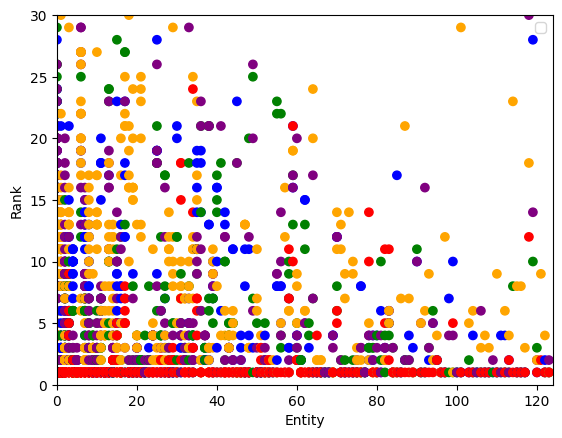

In [54]:
# plot the ranks for each entity, the entities are the x axis and the ranks are dots
pairs=[]
methods=[]
for i,(qid,_) in enumerate(num_ranks_per_qid):
    ranks=qid2ranks[qid]
    for method,rank in ranks.items():
        for r in rank:
            pairs.append((i,r))
            methods.append(method)
plt.scatter([p[0] for p in pairs], [p[1] for p in pairs],c=[map_method_color[m] for m in methods])
plt.legend()
plt.ylim(0,30)
plt.xlim(0,len(qid2ranks))
plt.ylabel("Rank")
plt.xlabel("Entity")
plt.legend()

In [91]:
top10=num_ranks_per_qid[:20]
last10=num_ranks_per_qid[-5:]
qids_plot=[qid for qid,_ in top10+last10]
qids_plot

['Q345',
 'Q302',
 'Q942467',
 'Q5588',
 'Q42207',
 'Q47652',
 'Q676555',
 'Q5580',
 'Q645312',
 'Q41370',
 'Q289957',
 'Q105320',
 'Q70899',
 'Q179718',
 'Q184874',
 'Q311469',
 'Q517',
 'Q338480',
 'Q44248',
 'Q48438',
 'Q196181',
 'Q1471',
 'Q8060',
 'Q440369',
 'Q405']

In [23]:
#boxplot for each entity and method
plt.figure(figsize=(20,8))
for i,qid in enumerate(qids_plot):
    ranks=qid2ranks[qid]
    for method,rank in ranks.items():
        #plt.boxplot(rank,positions=[i],patch_artist=True,boxprops=dict(facecolor=map_method_color[method]))
        #move the boxplot to avoid overlapping
        plot=plt.boxplot([r for r in rank if r<30],positions=[i-0.42+0.2*list(ranks.keys()).index(method)],patch_artist=True,boxprops=dict(facecolor=map_method_color[method]), showfliers=False)
        for median in plot["medians"]:
            median.set(color=map_method_color[method], linewidth=2)

        for box in plot["boxes"]:
            box.set(alpha=0.5)
        #plt.boxplot(rank,positions=[i-0.42+0.2*list(ranks.keys()).index(method)],boxprops=dict(facecolor=map_method_color[method]))
        #plt.scatter([i-0.42+0.2*list(ranks.keys()).index(method)]*len(rank),rank,c=map_method_color[method],label=method)
plt.ylabel("Rank")
plt.ylim(0,30)
plt.xlim(-0.5,len(qids_plot))
plt.xticks(range(len(qids_plot)),[f"{qid2label[qid]} ({qid}) ({len(qid2ranks[qid]["MIMIC"])})" for qid in qids_plot],rotation=90)
plt.legend(map_method_color.keys())
#add vertical lines to separate each entity
for i in range(len(qids_plot)):
    plt.axvline(x=i-0.5,color="grey")
plt.show()

NameError: name 'qids_plot' is not defined

<Figure size 2000x800 with 0 Axes>

In [5]:
baseline_results = pd.read_csv('BaselinesResults.csv')
baseline_results.head()

,model,hits@1,hits@3,hits@5,hits@10,hits@20,mr,mrr
0,MIMIC (no images),0.353488,0.528682,0.615504,0.733333,0.858915,53.714729,0.476866
1,MIMIC (no images),0.361240,0.545736,0.620155,0.717829,0.827907,85.339535,0.484353
2,MIMIC (no images),0.347287,0.524031,0.604651,0.711628,0.843411,109.094574,0.469369
3,MIMIC (no images),0.378295,0.531783,0.635659,0.762791,0.882171,54.565891,0.499826
4,MIMIC (no images),0.381395,0.528682,0.603101,0.713178,0.801550,56.347287,0.489982


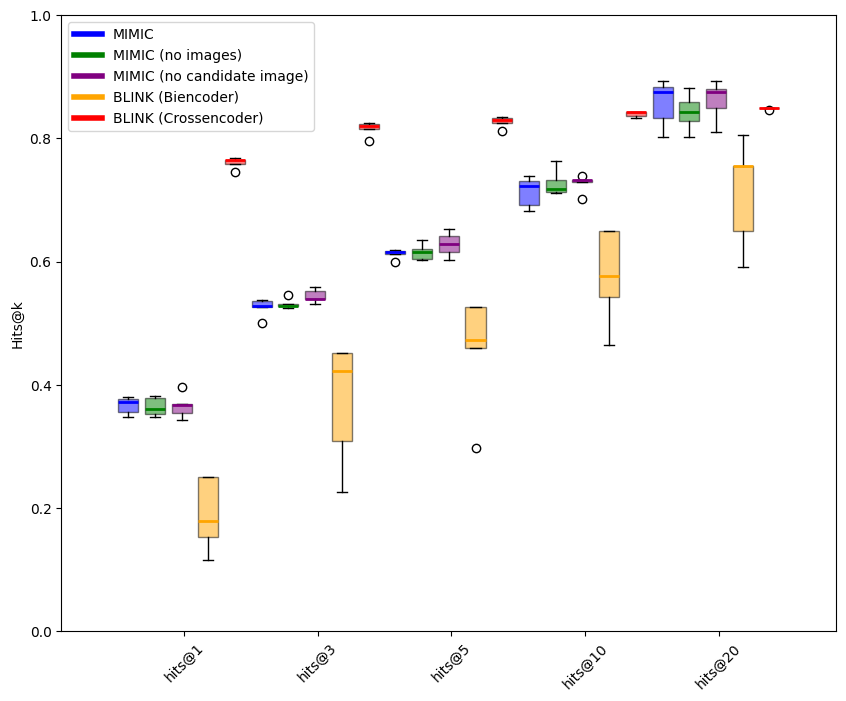

In [28]:
#boxplot from the baseline results. the x axis is hitt@k for k=1,3,5,10,20, then for each hits@k one boxplot per model
plt.figure(figsize=(10,8))
box_plots=[]
for method in map_method_color.keys():
    plots=[]
    for i,k in enumerate([1,3,5,10,20]):
        plot=plt.boxplot(baseline_results[baseline_results["model"]==method]["hits@{}".format(k)],positions=[i-0.42+0.2*list(map_method_color.keys()).index(method)],patch_artist=True,boxprops=dict(facecolor=map_method_color[method]), showfliers=True, label=method)
        plots.append(plot)
    box_plots.append(plots)
    for plot in plots:
        for median in plot["medians"]:
            median.set(color=map_method_color[method], linewidth=2)
        for box in plot["boxes"]:
            box.set(alpha=0.5)
plt.ylabel("Hits@k")
plt.ylim(0,1)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in map_method_color.values()]
plt.legend(handles, map_method_color.keys())
plt.xticks(rotation=45)
plt.xticks(range(5),[f"hits@{k}" for k in [1,3,5,10,20]])
#plt.legend(box_plots,[method for method in map_method_color.keys()])
#plt.legend(map_method_color)
plt.savefig("baseline_results.pdf")
plt.show()